In [1]:
import cv2
import random
import numpy as np
from helpers.limbus_detection import detect_limbus
from helpers.misc import jiggle_circle, tighten_circle
from helpers.view_detection import get_view_mask
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### Jiggle circle

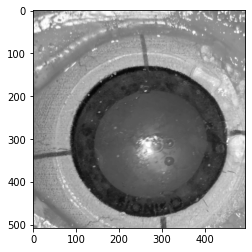

In [2]:
im = cv2.imread('/Users/mirek/Desktop/test.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')

In [6]:
CORRECT_CIRCLE = np.array((270,305,190))
# INIT_CIRCLE = np.array((300,300,235))
INIT_CIRCLE = np.array((350,300,190))


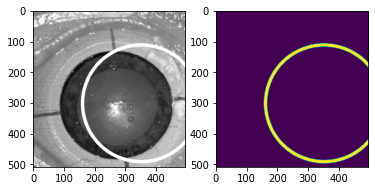

In [7]:
im_c = im.copy()
mask = np.zeros(im_c.shape, dtype=np.byte)
cv2.circle(im_c, (INIT_CIRCLE[0], INIT_CIRCLE[1]), INIT_CIRCLE[2], 255, 10)
cv2.circle(mask, (INIT_CIRCLE[0], INIT_CIRCLE[1]), INIT_CIRCLE[2], 1, 10)

_, axs = plt.subplots(1,2)
axs[0].imshow(im_c, cmap='gray')
axs[1].imshow(mask)

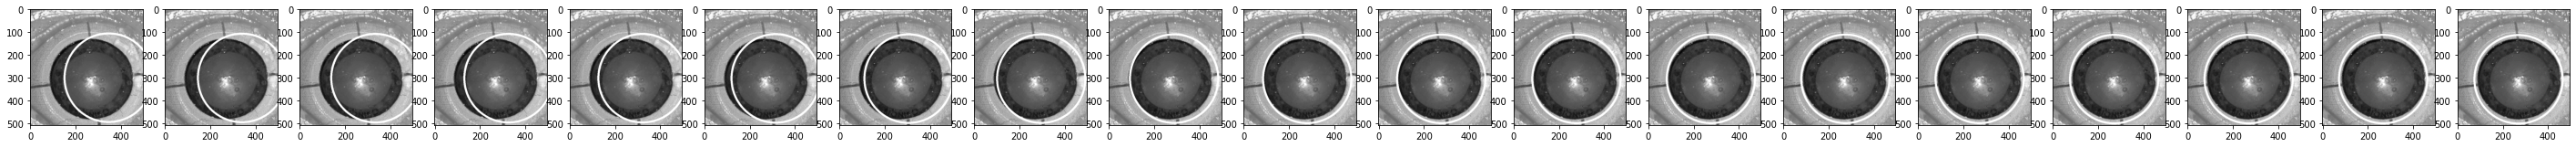

correct  [270 305 190] 
detected  [267.4026 306.5837 190.    ]


In [8]:
circle, intermediates = jiggle_circle(im, INIT_CIRCLE, return_intermediates=True)

_, axs = plt.subplots(1, len(intermediates), figsize=(50,10))
for i in range(len(intermediates)):
    axs[i].imshow(intermediates[i], cmap='gray')

plt.show()
print('correct ', CORRECT_CIRCLE, '\ndetected ', circle)